<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with TensorFlow

_Authors: Justin Pounders (ATL) and Riley Dalles (ATX)_

---

<a id="learning-objectives"></a>
### Learning Objectives
- Describe the basic `tensorflow` workflow.
- Create computational graphs representing basic feed-forward neural networks.
- Train neural networks using `tensorflow`
- Create and train neural networks for both regression and classification

In [7]:
import tensorflow as tf

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/jmpounders/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jmpounders/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jmpounders/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Computational Graphs

---

Tensorflow is fundamentally a library for creating **computational graphs**.

![](assets/comp_graph.png)

Let's define and evaluate this "computational graph."

**There are two phases to building a `tensorflow` model.**

1. Graph construction
2. Training/evaluation

In [5]:
# Build the graph

a = tf.Variable(3, name='a')
b = tf.Variable(4, name='a')
c = a + b
d = b + 1
e = c * d

In [6]:
# Evaluate the graph

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = e.eval()
    print(result)

35


## Building a Neural Network for Regression

---

Let's start by building a neural net for _regression_.  These are the steps we will follow:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

### Steps 1-4

In [15]:
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing

data = load_boston()
data = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Step 5: Build the network

In [16]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')

hidden1 = tf.layers.dense(X, units=13, 
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, 
                        units=1,
                        activation=None)

loss = tf.losses.mean_squared_error(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.01)

training_op = optimizer.minimize(loss)

### Step 6: Train the network

In [17]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(500):
        sess.run(training_op, 
                 feed_dict={X:X_train, y:y_train})
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 5.163233 5.2562656
epoch 11 2.3126757 2.2916677
epoch 21 1.3403842 1.3267441
epoch 31 0.9333978 0.95970064
epoch 41 0.83997875 0.910186
epoch 51 0.73500854 0.79353595
epoch 61 0.6658193 0.70154965
epoch 71 0.61470366 0.6455827
epoch 81 0.5738064 0.60928035
epoch 91 0.541805 0.57471806
epoch 101 0.5158607 0.54409945
epoch 111 0.49619114 0.5202221
epoch 121 0.481416 0.50551057
epoch 131 0.46923885 0.4921681
epoch 141 0.4588597 0.47836205
epoch 151 0.44992343 0.467738
epoch 161 0.44224173 0.4587371
epoch 171 0.4355964 0.45080036
epoch 181 0.42971554 0.4441786
epoch 191 0.42463115 0.43819943
epoch 201 0.42021725 0.4329442
epoch 211 0.41635755 0.4285457
epoch 221 0.4129211 0.42480326
epoch 231 0.4099591 0.42180276
epoch 241 0.40736318 0.41924742
epoch 251 0.4049413 0.4170603
epoch 261 0.40259543 0.4151917
epoch 271 0.40027225 0.41373214
epoch 281 0.3980247 0.4126796
epoch 291 0.39593822 0.4117901
epoch 301 0.39399645 0.41126195
epoch 311 0.39213815 0.4108729
epoch 321 0.39038476 0.4

In [18]:
metrics.r2_score(y_test, pred)

0.711123210595199

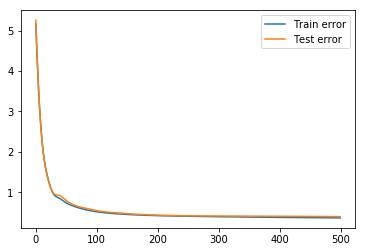

In [19]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

## Building a Neural Network for Binary Classification

---

Now we'll build a neural net for _classification_.  We will follow the same steps as for regression:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

In [56]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# 1 = benign
# 0 = malignant

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

y_train = y_train*-1 + 1
y_test = y_test*-1 + 1

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [62]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')

hidden1 = tf.layers.dense(X, units=y_train.shape[1],
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, units=1,
                        name='y_hat',
                        activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.01)

training_op = optimizer.minimize(loss)

In [63]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(501):
        sess.run(training_op,
                     feed_dict={X:X_train, y:y_train})
        
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 0.57875836 0.5398404
epoch 11 0.4587934 0.44964626
epoch 21 0.41639358 0.40737337
epoch 31 0.38369402 0.37390658
epoch 41 0.3554391 0.3459855
epoch 51 0.3302869 0.32335833
epoch 61 0.30778322 0.30388555
epoch 71 0.28751826 0.2848202
epoch 81 0.26921818 0.2667938
epoch 91 0.2527396 0.25109202
epoch 101 0.2376699 0.23650482
epoch 111 0.2239673 0.22214286
epoch 121 0.21146941 0.21077825
epoch 131 0.2000949 0.20069146
epoch 141 0.18970266 0.1916492
epoch 151 0.18019477 0.18331209
epoch 161 0.17148101 0.17568147
epoch 171 0.16348508 0.16860087
epoch 181 0.15614143 0.16203576
epoch 191 0.14939229 0.15596294
epoch 201 0.14316024 0.15040751
epoch 211 0.1374194 0.1451925
epoch 221 0.13211636 0.14043687
epoch 231 0.12720731 0.13609524
epoch 241 0.12266176 0.13207585
epoch 251 0.118447565 0.12834074
epoch 261 0.11453241 0.12490374
epoch 271 0.110893875 0.12170996
epoch 281 0.107503876 0.11876113
epoch 291 0.10434558 0.11596357
epoch 301 0.101395756 0.11332301
epoch 311 0.09863935 0.110863

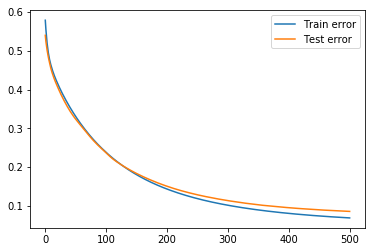

In [64]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

Before moving on, let's go back and add a new hidden layer to our network...

### Batching the input

What if we can't store all of the training data in memory?

We can split the data up into "batches" and feed them to the network one at a time.

In [50]:
kf = KFold(n_splits=2, shuffle=True, random_state=42)

batches = [test for test, _ in kf.split(X_train, y_train)]

In [51]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(101):
        for batch in batches:
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op,
                     feed_dict={X:X_batch, y:y_batch})
        
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 0.7825215 0.80105567
epoch 11 0.5686156 0.5668379
epoch 21 0.43626976 0.41092923
epoch 31 0.3535071 0.3212885
epoch 41 0.29764137 0.2679142
epoch 51 0.256972 0.23008114
epoch 61 0.22553551 0.20125288
epoch 71 0.20107688 0.17777449
epoch 81 0.18167031 0.15862547
epoch 91 0.1659578 0.14301917
epoch 101 0.15299517 0.13055713


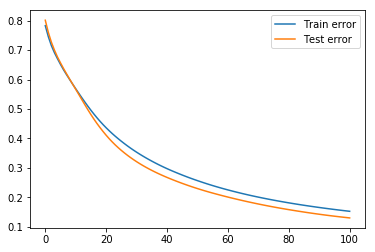

In [52]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

In [53]:
pred_bin = (pred > 0.5).astype(int)

In [54]:
metrics.accuracy_score(y_test, pred_bin)

0.972027972027972

In [55]:
metrics.confusion_matrix(y_test, pred_bin)

array([[80,  2],
       [ 2, 59]])

## Building a Neural Network for Multi-Class Classification

---

In [16]:
from sklearn.datasets import load_iris
import pandas as pd

In [27]:
data = load_iris()

y = data.target
y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(data.data, y)


ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [41]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')

hidden1 = tf.layers.dense(X, units=X_train.shape[1], 
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, 
                        units=y_train.shape[1],
                        activation=None)

loss = tf.losses.softmax_cross_entropy(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.01)

training_op = optimizer.minimize(loss)

saver = tf.train.Saver()

In [42]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(501):
        sess.run(training_op,
                 feed_dict={X:X_train, y:y_train})
        
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
            
    saver.save(sess, './iris.ckpt')
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 1.055986 1.1455314
epoch 11 0.8743173 0.9328565
epoch 21 0.69764715 0.77531767
epoch 31 0.5406632 0.6198665
epoch 41 0.4217369 0.48402515
epoch 51 0.33580488 0.38903293
epoch 61 0.27514824 0.32050118
epoch 71 0.22704796 0.26541728
epoch 81 0.18876393 0.21954581
epoch 91 0.15945064 0.18342614
epoch 101 0.13651808 0.15603478
epoch 111 0.119069174 0.13615069
epoch 121 0.106029965 0.11916291
epoch 131 0.09689738 0.106582865
epoch 141 0.089686856 0.09672151
epoch 151 0.083911315 0.088511996
epoch 161 0.07918339 0.08206173
epoch 171 0.075255446 0.07668066
epoch 181 0.071939275 0.07224007
epoch 191 0.069103755 0.06850023
epoch 201 0.06670962 0.065235965
epoch 211 0.06464308 0.062243864
epoch 221 0.06284601 0.059610274
epoch 231 0.061273064 0.05725705
epoch 241 0.059895735 0.05509268
epoch 251 0.058676567 0.053228553
epoch 261 0.05758671 0.051518053
epoch 271 0.05660487 0.05000378
epoch 281 0.05571609 0.048619326
epoch 291 0.05490785 0.047358435
epoch 301 0.05416896 0.046211448
epoch 3

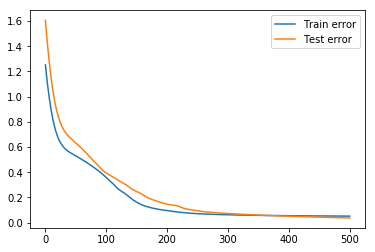

In [34]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

In [40]:
pred[0], y_test[0]

(array([-4.22811 ,  4.44836 , -1.166159], dtype=float32),
 array([0, 1, 0], dtype=uint8))

## Saving Your Model

---

In [46]:
with tf.Session() as sess:
    saver.restore(sess, './iris.ckpt')
    pred = sess.run(y_hat, feed_dict={X:X_test})
    
pred

INFO:tensorflow:Restoring parameters from ./iris.ckpt


array([[ -4.5962763 ,   2.3085513 ,  -5.2152634 ],
       [ -0.64348024,   3.423298  ,  -7.242627  ],
       [ -9.136091  ,  -5.1863213 ,   1.7965195 ],
       [ -9.518849  ,  -0.44511986,   0.5633383 ],
       [ -3.967315  ,   2.815835  ,  -1.4160478 ],
       [ -5.115718  ,   2.3342774 ,  -1.4199467 ],
       [  5.8419304 ,  -4.032305  ,  -5.958152  ],
       [  5.4483643 ,  -4.6990013 ,  -4.721398  ],
       [-12.362675  ,  -7.1672726 ,   3.302871  ],
       [ -9.64221   ,  -3.761366  ,   1.8003299 ],
       [  6.144955  ,  -2.6360006 ,  -7.734229  ],
       [ -8.683875  ,  -1.5458021 ,   0.8955207 ],
       [ -6.074457  ,   2.5636206 ,  -1.4820247 ],
       [-11.394483  ,  -5.579601  ,   2.6292999 ],
       [ -6.1747317 ,   4.3757405 ,  -1.5180924 ],
       [-11.9856205 ,  -5.2234306 ,   2.5505288 ],
       [  5.9409046 ,  -3.881341  ,  -6.2535925 ],
       [ -8.41814   ,  -0.29515314,  -1.2205696 ],
       [ -4.0736866 ,   3.271796  ,  -4.797303  ],
       [  6.144955  ,  -2.63600

In [56]:
class_preds = np.empty(pred.shape[0], dtype=np.int32)
for i,clas in enumerate(map(np.argmax, pred)):
    class_preds[i] = clas
    
class_preds

array([1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2], dtype=int32)